<a href="https://colab.research.google.com/github/kungumabalaji/balaji-/blob/main/Another_copy_of_RBM_WEEK_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.ndimage import convolve  # it process the image and apply the fillter
from sklearn import datasets # pretrained data sets
from sklearn.preprocessing import minmax_scale # for nonmaliztion the data to 0, 1
import matplotlib.pyplot as plt # for visual
plt.style.use("classic") # its a traditional style in matploit

In [ ]:
def augent_datasets(x,y):   # Augmenting data means making slightly modified copies of your data so your model can learn from more examples. This helps the model generalize better.

    vector_direction = [
        [[0,1,0],[0,0,0],[0,0,0]], # vector , It helps the model get better at recognizing objects, no matter where they are in the image.
        [[0,1,0],[1,0,0],[0,0,0]], # This is a list of 3 filters. Think of these filters as small patterns that will be used to shift or modify the data in different ways
        [[0,1,0],[0,0,0],[0,0,1]]
    ]
    def shift_pos(x,w):
      return convolve(x.reshape((8,8)), mode="constant", weights=w).ravel()   # the x is i d like one line  nubers so Take a 1D data point (like an image) and reshape it into a 2D grid (like an 8x8 image)..
#Apply a filter (which is just a pattern) to shift or change the image in some way.Flatten the changed image back into a 1D line of numbers
    X = np.concatenate( #  is a function from the NumPy library that joins arrays together

        [X]+ [np.apply_along_axis(shift,1,X,vector) for vector in direction_vectors]  #This creates new versions of your data by applying the shift_pos function (which shifts the data) with each filter in vector_direction.


    )
#After augmenting the data (shifting the images), the number of images increases.The labels need to match the new, augmented data, so we repeat the original labels as many times as we created new versions of the da
    Y = np.concatenate([Y for _ in range(5)], axis=0) #The X dataset has been augmented, meaning it has more data now. Each data point in X has a label in y.Since we created 5 versions of each data point (1 original + 4 shifted), we need to repeat the labels y 5 times
    return X,Y

In [ ]:
X, y = datasets.load_digits(return_X_y=True) # Changed '-' to '=' for assignment
X = np.asanyarray(X, "float32")
X, Y = augent_datasets(X, y) # Changed nudge_datasets to augent_datasets which is defined in your code

X = minmax_scale(X, feature_range=(0, 1))
# Added these lines to define train_test_split
from sklearn.model_selection import train_test_split
# train_test_split returns 4 values: X_train, X_test, y_train, y_test
# The original code only expected 3, resulting in the ValueError
# Changed the assignment to capture all 4 returned values
X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
def augent_datasets(x, y):

    vector_direction = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 1, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 1, 0], [0, 0, 0], [0, 0, 1]]
    ]

    def shift_pos(x, w):
        return convolve(x.reshape((8, 8)), mode="constant", weights=w).ravel()

    # Assign the result to a new variable, X_augmented, to avoid the UnboundLocalError
    X_augmented = np.concatenate(
        [x] + [np.apply_along_axis(shift_pos, 1, x, vector) for vector in vector_direction]
    )

    Y = np.concatenate([y for _ in range(4)], axis=0)  # Updated to repeat labels 4 times (3 shifts + 1 original)

    # Return the augmented data
    return X_augmented, Y

In [ ]:
import numpy as np
from scipy.ndimage import convolve

def augent_datasets(x, y):

    vector_direction = [
        [[0, 1, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 1, 0], [1, 0, 0], [0, 0, 0]],
        [[0, 1, 0], [0, 0, 0], [0, 0, 1]]
    ]

    def shift_pos(x, w):
        return convolve(x.reshape((8, 8)), mode="constant", weights=w).ravel()

    # The error was here: You were using X before it was assigned within the function.
    # Instead, use the input 'x'
    X = np.concatenate(
        [x] + [np.apply_along_axis(shift_pos, 1, x, vector) for vector in vector_direction]
    )

    Y = np.concatenate([y for _ in range(4)], axis=0)  # Changed to 4 to match the number of shifts + original
    return X, Y

In [ ]:
X, y = datasets.load_digits(return_X_y=True) # Changed '-' to '=' for assignment
X = np.asanyarray(X, "float32")
X, Y = augent_datasets(X, y) # Changed nudge_datasets to augent_datasets which is defined in your code

X = minmax_scale(X, feature_range=(0, 1))
# Added these lines to define train_test_split
from sklearn.model_selection import train_test_split
# train_test_split returns 4 values: X_train, X_test, y_train, y_test
# The original code only expected 3, resulting in the ValueError
# Changed the assignment to capture all 4 returned values
X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM # Import BernoulliRBM

# Instantiate the BernoulliRBM object
rbm = BernoulliRBM()

neural_net = MLPClassifier(activation = 'relu', hidden_layer_sizes=(100,10), random_state=1, verbose=True)
# create rbm model
rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", neural_net)])

rbm.learning_rate = 0.06

rbm.n_components = 100

In [ ]:
rbm_features_classifier.fit(X_train, y_train)

Iteration 1, loss = 2.34677159
Iteration 2, loss = 2.29051423
Iteration 3, loss = 2.24974536
Iteration 4, loss = 2.20762924
Iteration 5, loss = 2.15503176
Iteration 6, loss = 2.08908903
Iteration 7, loss = 2.02049482
Iteration 8, loss = 1.95138865
Iteration 9, loss = 1.88321588
Iteration 10, loss = 1.81799260
Iteration 11, loss = 1.75900546
Iteration 12, loss = 1.70618232
Iteration 13, loss = 1.65237324
Iteration 14, loss = 1.60621819
Iteration 15, loss = 1.56070169
Iteration 16, loss = 1.52126394
Iteration 17, loss = 1.47850123
Iteration 18, loss = 1.44012843
Iteration 19, loss = 1.40470622
Iteration 20, loss = 1.37404534
Iteration 21, loss = 1.34423999
Iteration 22, loss = 1.31461621
Iteration 23, loss = 1.28185247
Iteration 24, loss = 1.24520011
Iteration 25, loss = 1.19526424
Iteration 26, loss = 1.15278646
Iteration 27, loss = 1.11205582
Iteration 28, loss = 1.08214453
Iteration 29, loss = 1.05721489
Iteration 30, loss = 1.03691546
Iteration 31, loss = 1.01539948
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('rbm', BernoulliRBM(learning_rate=0.06, n_components=100)),
                ('logistic',
                 MLPClassifier(hidden_layer_sizes=(100, 10), random_state=1,
                               verbose=True))])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn import metrics # Import the metrics module

# Instantiate the BernoulliRBM object
rbm = BernoulliRBM()

neural_net = MLPClassifier(activation = 'relu', hidden_layer_sizes=(100,10), random_state=1, verbose=True)
# create rbm model
rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", neural_net)])

rbm.learning_rate = 0.06

rbm.n_components = 100

# Fit the pipeline to your training data
rbm_features_classifier.fit(X_train, y_train) # This line is added to fit the pipeline before prediction

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Neural network using RBM features:\n%s\n"
    % (metrics.classification_report(Y_test, Y_pred)) # Now metrics is defined and can be used
)

Iteration 1, loss = 2.34226265
Iteration 2, loss = 2.28270870
Iteration 3, loss = 2.21927344
Iteration 4, loss = 2.15028443
Iteration 5, loss = 2.07613736
Iteration 6, loss = 1.99512553
Iteration 7, loss = 1.91962953
Iteration 8, loss = 1.84958204
Iteration 9, loss = 1.77938229
Iteration 10, loss = 1.71753774
Iteration 11, loss = 1.66180488
Iteration 12, loss = 1.61116877
Iteration 13, loss = 1.56440263
Iteration 14, loss = 1.52272972
Iteration 15, loss = 1.48450277
Iteration 16, loss = 1.44716646
Iteration 17, loss = 1.41411926
Iteration 18, loss = 1.37703335
Iteration 19, loss = 1.34550314
Iteration 20, loss = 1.31547394
Iteration 21, loss = 1.29154385
Iteration 22, loss = 1.25907737
Iteration 23, loss = 1.22799933
Iteration 24, loss = 1.20227999
Iteration 25, loss = 1.18323171
Iteration 26, loss = 1.16542673
Iteration 27, loss = 1.14009245
Iteration 28, loss = 1.12249151
Iteration 29, loss = 1.10486357
Iteration 30, loss = 1.09223848
Iteration 31, loss = 1.07434854
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


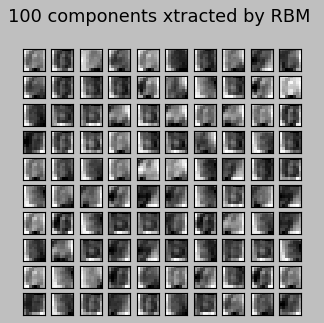

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2,4))
for i , comp in enumerate(rbm.components_):
    plt.subplot(10,10,i+1)
    plt.imshow(comp.reshape((8,8)), cmap=plt.cm.gray_r, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
# Change 'subtitle' to 'suptitle' to set the title for the entire figure
plt.suptitle("100 components xtracted by RBM ", fontsize=16) # Corrected line
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()